In [76]:
import eurostat
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

In [77]:
settings = {'figure.figsize':(14,4),
            'figure.dpi':144,
            'figure.facecolor':'w',
            'axes.spines.top':False,
            'axes.spines.bottom':False,
            'axes.spines.left':False,
            'axes.spines.right':False,
            'axes.grid':True,
            'grid.linestyle':'--',
            'grid.linewidth':0.5, 
            'figure.constrained_layout.use':True}
plt.rcParams.update(settings)

%config InlineBackend.figure_format = "retina"

In [78]:
#### WHERE TO SAVE DATA'
output = "../output_mo_qt/"
figures = "../figures/"	

In [79]:
start_date = "1983-01-01"

data = eurostat.get_data_df('une_rt_m')   ###############
data.to_csv("tmp.csv")

data = data[data['freq'] == 'M']
data = data[data['s_adj'] == 'SA']
data = data[data['age'] == 'TOTAL']
data = data[data['unit'] == 'PC_ACT']
data = data[data['sex'].isin(['M', 'F'])]
data.head()

,freq,s_adj,age,unit,sex,geo\TIME_PERIOD,1983-01,1983-02,1983-03,1983-04,...,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10
666,M,SA,TOTAL,PC_ACT,F,AT,NaN,NaN,NaN,NaN,...,4.6,4.3,4.9,4.9,4.4,4.8,4.4,4.6,5.1,5.6
667,M,SA,TOTAL,PC_ACT,F,BA,NaN,NaN,NaN,NaN,...,16.7,16.6,16.5,16.4,16.3,16.4,16.4,16.5,16.4,NaN
668,M,SA,TOTAL,PC_ACT,F,BE,NaN,NaN,NaN,NaN,...,5.1,5.0,5.0,5.1,5.2,5.2,5.2,5.2,5.4,5.5
669,M,SA,TOTAL,PC_ACT,F,BG,NaN,NaN,NaN,NaN,...,4.5,4.6,4.4,4.1,3.9,3.8,3.9,3.9,3.9,3.8
670,M,SA,TOTAL,PC_ACT,F,CH,NaN,NaN,NaN,NaN,...,4.2,4.3,4.3,4.4,4.5,4.6,4.6,4.7,4.9,NaN


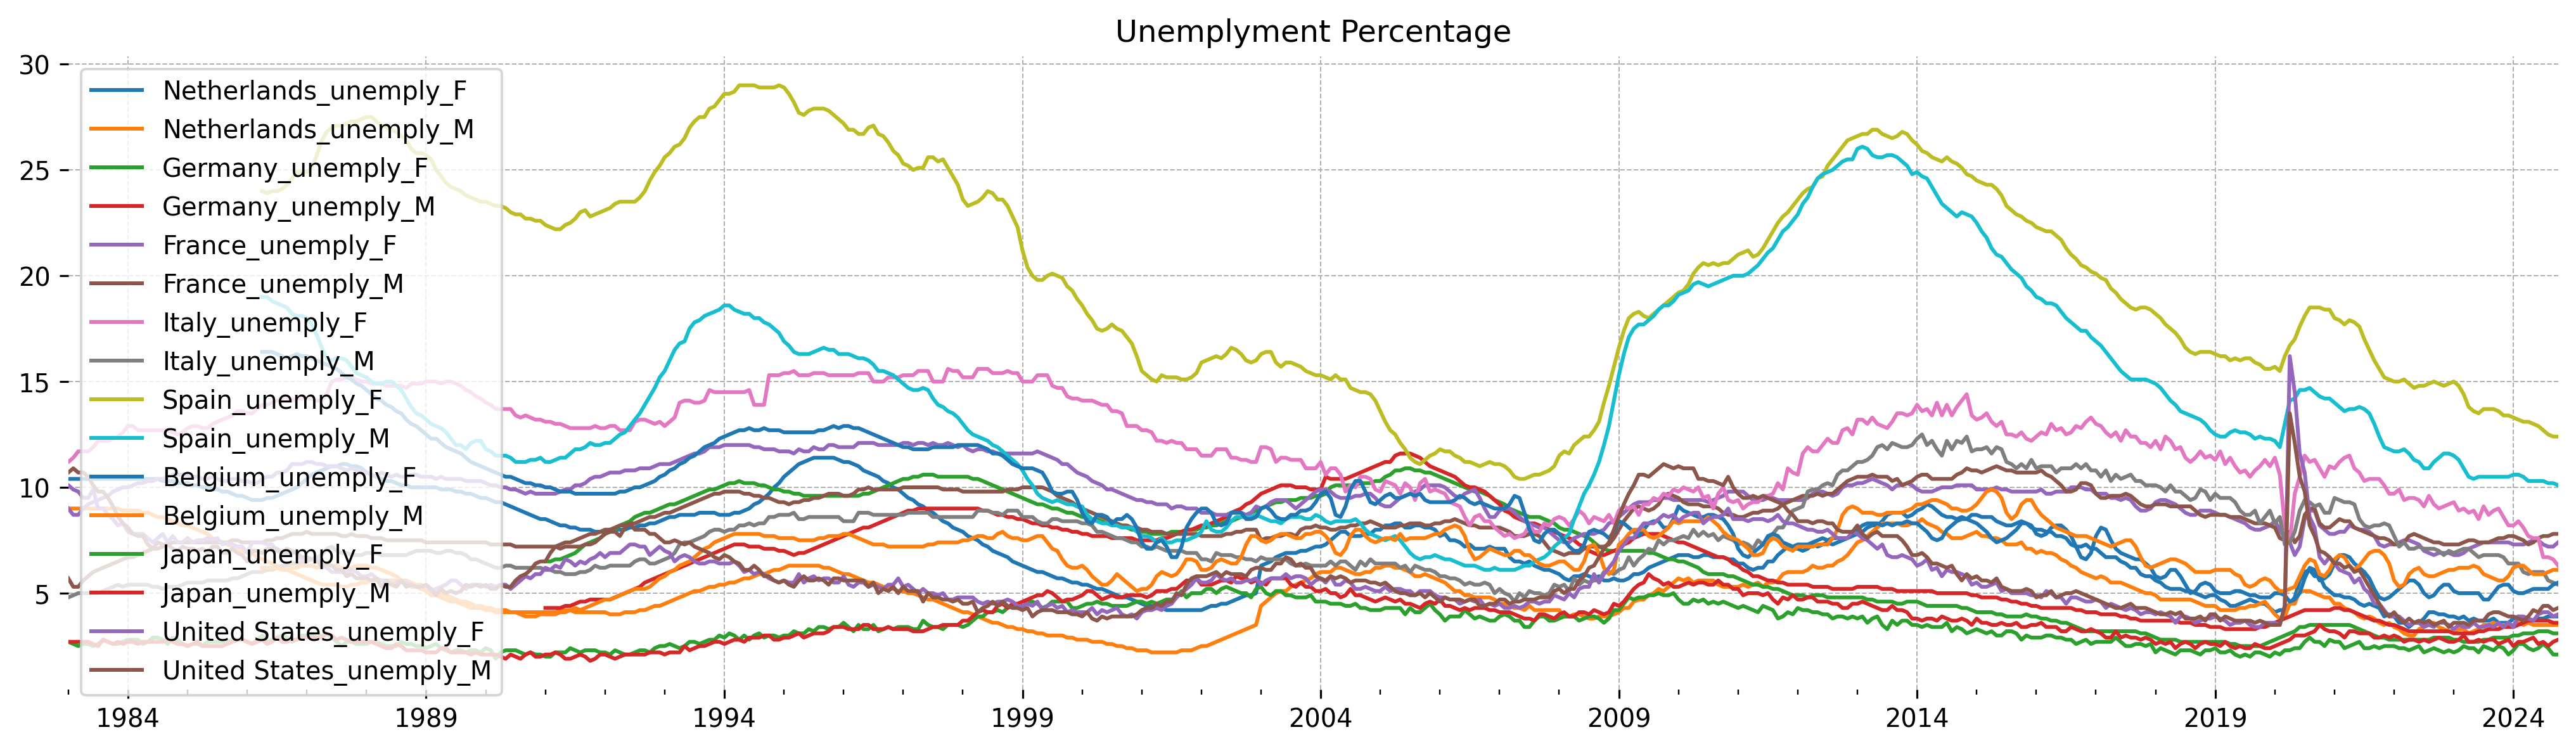

In [80]:

dt2 = data.iloc[:, 5:]
dt2 = dt2.T
# after transpose, first row is the column names
dt2.columns = dt2.iloc[0,:]
# remove first row
data1 = dt2.iloc[1:]

data1.index = pd.date_range(start = start_date,  periods = data1.shape[0], freq = "MS")
data1 = data1.loc[:, ['NL','DE','FR','IT','ES','BE','JP','US']]
data1.columns = ['Netherlands_unemply_F', 'Netherlands_unemply_M', 'Germany_unemply_F', 'Germany_unemply_M', 'France_unemply_F', 'France_unemply_M','Italy_unemply_F','Italy_unemply_M','Spain_unemply_F', 'Spain_unemply_M','Belgium_unemply_F','Belgium_unemply_M','Japan_unemply_F','Japan_unemply_M', 'United States_unemply_F','United States_unemply_M']
data1.plot(title='Unemplyment Percentage');
data1.to_csv(output + "unemployment_mo.csv")


### European GDP

In [94]:
start_date = '01/01/1975'

data = eurostat.get_data_df('namq_10_gdp')
data = data[data["unit"] == "CLV10_MEUR"]
data = data[data["s_adj"] == "NSA"]
data = data[data['na_item'] == 'B1G']

<Axes: >

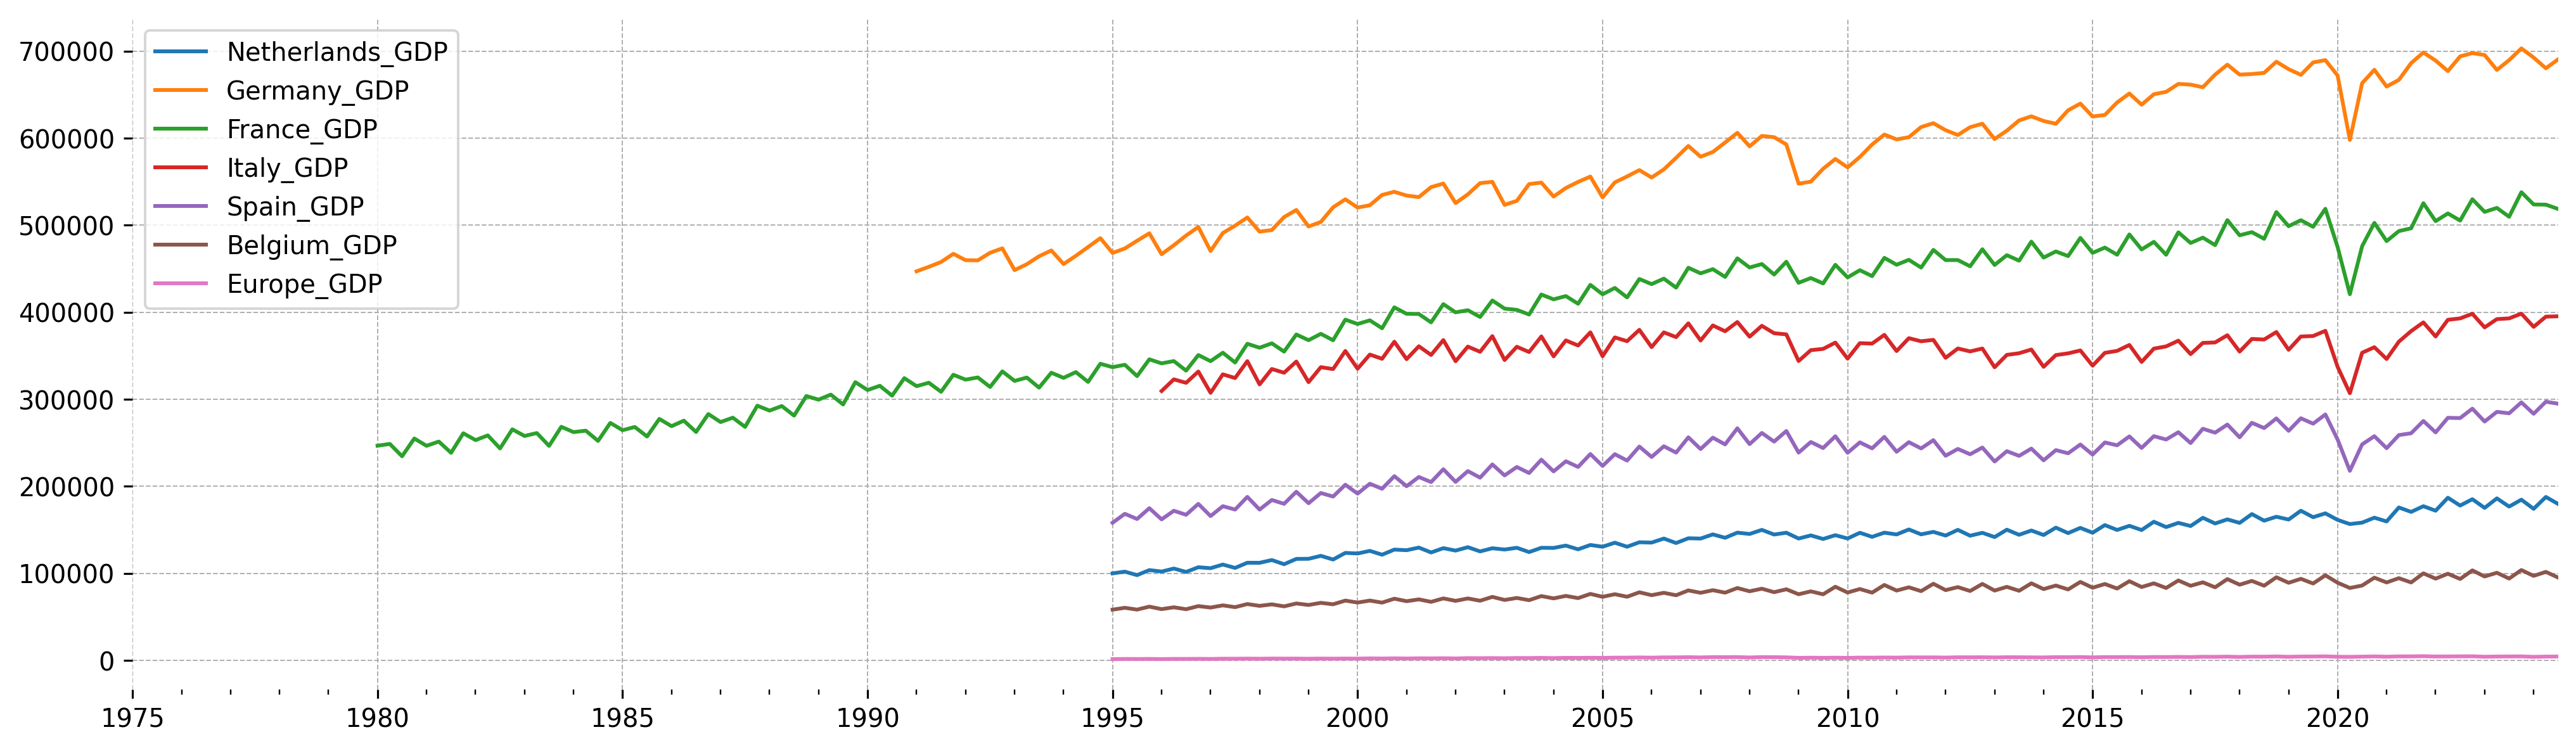

In [95]:
##################
# select needed items for analysis
##################

dt2 = data.iloc[:, 4:]
dt2 = dt2.T
# after transpose, first row is the column names
dt2.columns = dt2.iloc[0,:]
# remove first row
data1 = dt2.iloc[1:]
data1.index = pd.date_range(start = start_date,  periods = data1.shape[0], freq = "QS")
data1 = data1.loc[:, ['NL','DE','FR','IT','ES','BE','EE']]
data1.columns = ['Netherlands_GDP', 'Germany_GDP', 'France_GDP', 'Italy_GDP', 'Spain_GDP', 'Belgium_GDP','Europe_GDP']

data1.to_csv(output + "europe_gdp_qt.csv")
data1.plot()

### Inflation

<Axes: >

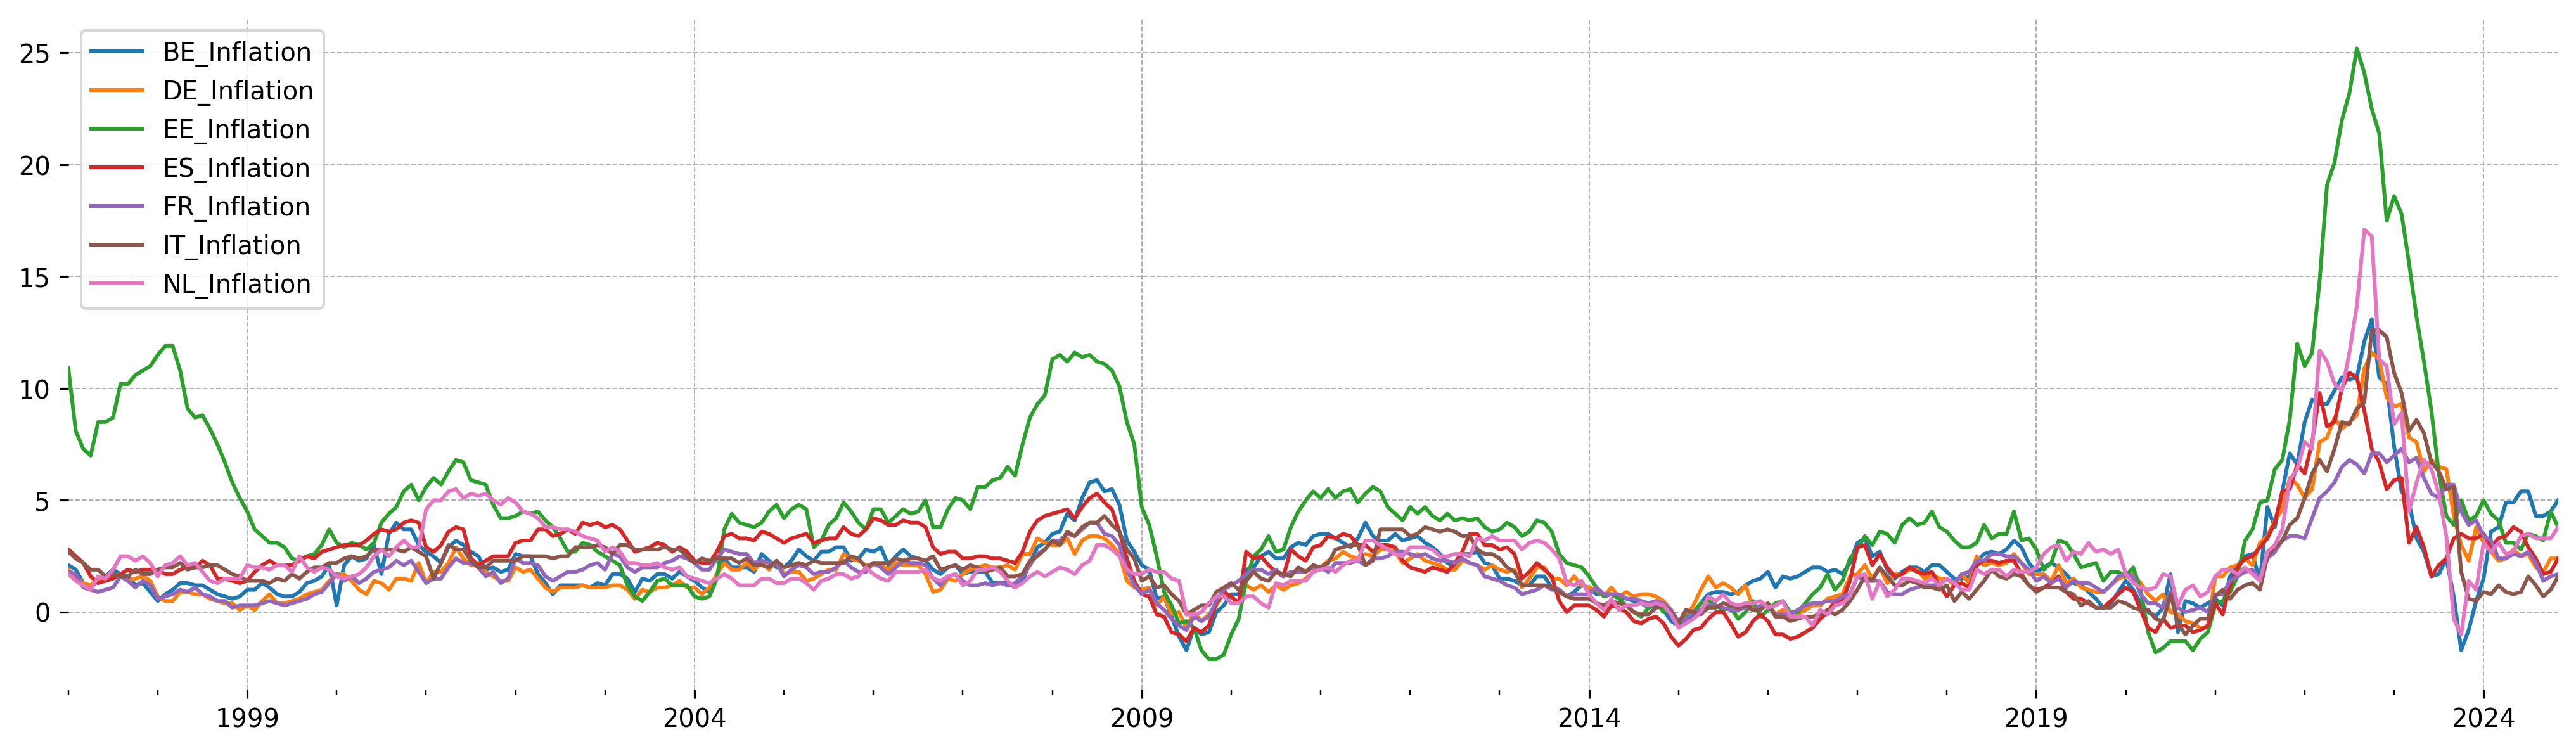

In [96]:
start_date = '1997-01-01'

data = eurostat.get_data_df('prc_hicp_manr')
data = data[data['freq'] == 'M']
data = data[data['unit'] == 'RCH_A']
data = data[data['coicop'] == 'CP00']

data = data[data['geo\\TIME_PERIOD'].isin(['BE','DE','EE','ES','FR','IT','NL'])]

dt2 = data.iloc[:, 3:]
dt2 = dt2.T
dt2.columns = dt2.iloc[0,:]
dt2.columns = [x + "_Inflation" for x in dt2.columns]
dt2 = dt2.iloc[1:]
dt2.index = pd.date_range(start = start_date,  periods = dt2.shape[0], freq = "MS")

dt2 = dt2.rename_axis(None, axis=1)

dt2.to_csv(output + "europe_inflation_mo.csv")
dt2.plot()
